In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
data = pd.read_excel('lab6.xlsx')
Ua = np.array(data.iloc[0:, 2], dtype='float64')
Ia = np.array(data.iloc[0:, 4], dtype='float64')

In [3]:
data

,№,Un,Ua,In,Ia,Inas
0,1,4.0,100,1.62,5.60,NaN
1,2,4.0,70,1.60,4.89,NaN
2,3,4.0,40,1.61,4.80,NaN
3,4,3.9,100,1.58,4.08,NaN
4,5,3.9,70,1.58,3.59,NaN
5,6,3.9,40,1.58,3.91,NaN
6,7,3.8,100,1.54,3.06,NaN
7,8,3.8,70,1.56,2.70,NaN
8,9,3.8,40,1.56,2.91,NaN
9,10,3.7,100,1.54,2.25,NaN


In [4]:
Iavr=np.zeros(11,dtype='float64') #среднее в тройке
k=np.zeros(11,dtype='float64') #угловой коэффициент
Inas=np.zeros(11,dtype='float64') #ток насыщения
for i in range (0,11):
    Ia3=np.array(data.iloc[3*i:3*i+3, 4], dtype='float64') #тройка значений
    Inas[i]=((100*Ia3[0]+70*Ia3[1]+40*Ia[2])*210-(Ia3[0]+Ia3[1]+Ia[2])*(210**2))/((210**2)-3*(210**2))
    for j in range (3):
        Iavr[i]+=Ia3[j]/3
    #k[i]=Iavr[i]/60 #угловой коэф
#for i in range (0,11):
    #Inas[i]=Iavr[i]-k[i]*100
    
Inas

array([5.03952381, 4.20809524, 3.64428571, 3.27547619, 2.92809524,
       2.69      , 2.85809524, 2.52571429, 2.44380952, 2.11285714,
       2.04666667])

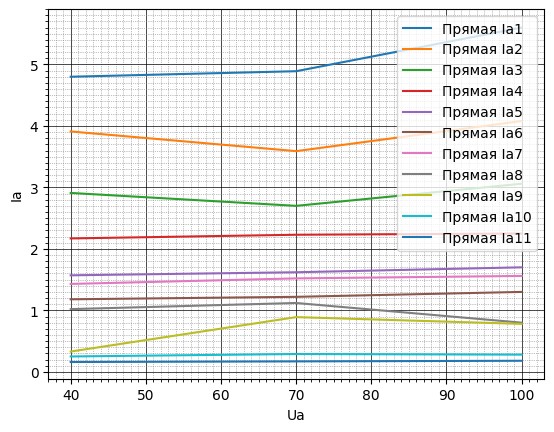

In [5]:
# пункт 3
# 11 графиков Ia(Ua)
cnt = 0
for i in range(11):
        cnt += 1
        Iai=Ia[3*i:3*i+3]
        Uai=Ua[3*i:3*i+3]
        plt.plot(Uai, Iai,label=f'Прямая Ia{cnt}')
        plt.xlabel("Ua")
        plt.ylabel("Ia")
        plt.grid(which='major', color='black', linestyle='-', linewidth=0.5)  # Основная сетка с интервалом разбиения
        plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)  # Дополнительная сетка
        plt.gca().set_xticks(np.arange(min(Uai)-3, max(Uai)+3, 1), minor=True)
        plt.gca().set_yticks(np.arange(0, 6, 0.1), minor=True)
        plt.legend()

array([2598.33333333, 2624.18367347, 2625.86956522, 2637.56637168,
       2646.13207547, 2748.85650224, 2782.8807947 , 2803.96103896,
       2853.84120172, 2878.92405063, 2897.29813665])

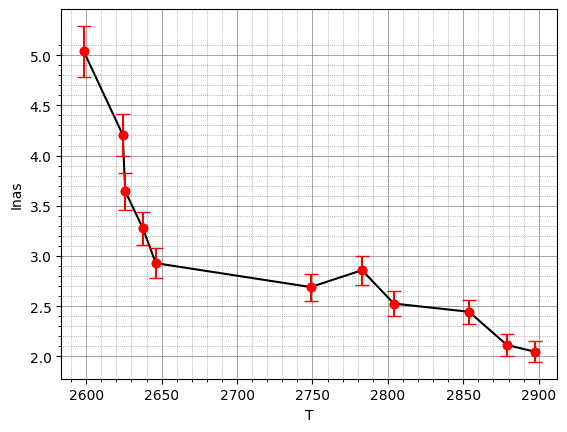

In [27]:
#пункт 5
Rk=np.zeros(11)
Inavr=np.zeros(11)
Un=np.array(data.iloc[0:33, 1])
Un=np.unique(Un)
Un=np.flip(Un)
T=np.zeros(11)
B=65.0
T0=293.0
Rk0=0.2
for i in range (0,11):
    In3=np.array(data.iloc[3*i:3*i+3, 3], dtype='float64')
    for j in range (3):
        Inavr[i]+=In3[j]/3
    Rk[i]=Un[i]/Inavr[i]
    T[i]=B+Rk[i]*(T0-B)/Rk0
#Пункт 6
T=np.sort(T)
plt.xlabel("T")
plt.ylabel("Inas")    
plt.plot(T,Inas,color='black')
plt.plot(T,Inas,'ro')
plt.errorbar(T, Inas,color='red', yerr=Inas*0.05, fmt='o', label=data.iloc[0,2], capsize=5)
plt.grid(which='major', color='gray', linestyle='-', linewidth=0.5)  # Основная сетка с интервалом разбиения
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)  # Дополнительная сетка
plt.gca().set_xticks(np.arange(2590, 2910, 10), minor=True)
plt.gca().set_yticks(np.arange(2, 5.2, 0.1), minor=True)
T

array([-14.10793939, -14.30804018, -14.45317438, -14.56876062,
       -14.68735639, -14.84833938, -14.81232845, -14.9510528 ,
       -15.01928421, -15.18230269, -15.22685536])

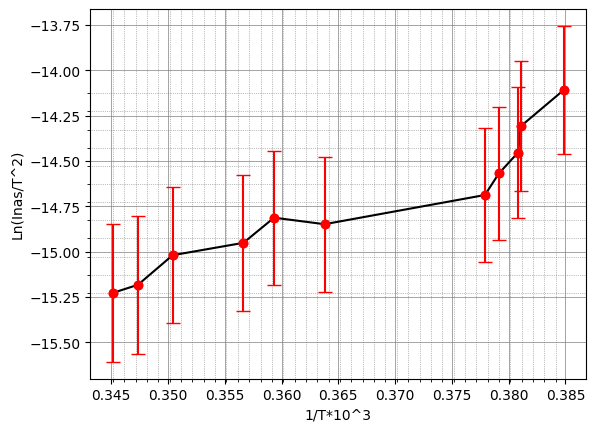

In [28]:
Ln=np.zeros(11)
T1=np.zeros(11)
for i in range(0,11):
    Ln[i]=math.log(Inas[i]/(T[i]**2))
    T1[i]=1000/T[i]
plt.plot(T1,Ln,color='black')
plt.plot(T1,Ln,'ro')
plt.xlabel("1/T*10^3")
plt.ylabel("Ln(Inas/T^2)")    
plt.grid(which='major', color='gray', linestyle='-', linewidth=0.5)  # Основная сетка с интервалом разбиения
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)  # Дополнительная сетка
plt.errorbar(T1, Ln,color='red', yerr=abs(Ln*0.025), fmt='o', label=data.iloc[0,2], capsize=5)
plt.gca().set_yticks(np.arange(min(Ln), max(Ln), 0.1), minor=True)
plt.gca().set_xticks(np.arange(min(T1), max(T1), 0.001), minor=True)
#plt.xlim([min(T1-0.001), max(T1+0.001)])
#plt.ylim([min(Ln)-0.01, max(Ln)+0.01])
Ln